# Simple Custom Digit Recognizer

## Import Libraries

In [1]:
!pip3 install tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pandas as pd

## Data preparation

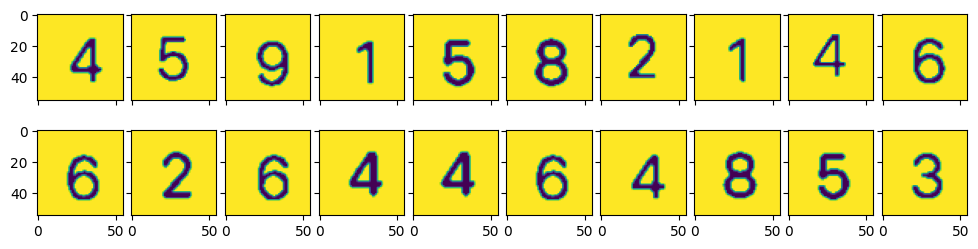

In [2]:
df = pd.read_csv("Dataset_Train.csv")

fig, ax = plt.subplots(2,10, figsize=(12, 3), sharex=True, sharey=True)
img_idx = np.random.choice(df.shape[0], 2*10)
for i, ax in enumerate(ax.flatten()):
    # we select the i-th row of the dataframe, and reshape it to a 55x55 image  (the last column is the label so we exclude)
    img = Image.fromarray(df.iloc[img_idx[i], :-1].values.reshape(55,-1).astype('uint8'))
    ax.imshow(img) # or ax.imshow(img, cmap='gray_r')

plt.subplots_adjust(hspace=0, wspace=0.1)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,3016,3017,3018,3019,3020,3021,3022,3023,3024,label
0,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,0
1,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
2,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
3,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1
4,255,255,255,255,255,255,255,255,255,255,...,255,255,255,255,255,255,255,255,255,1


In [4]:
df.shape

(1530, 3026)

In [5]:
df.isnull().sum().sum()

0

In [6]:
# we select all the rows and all the columns except the last one (the label)
digits = df.iloc[:, :-1].values
labels = df.iloc[:, -1].values
print("digits shape", digits.shape)
print("labels shape",labels.shape)

digits shape (1530, 3025)
labels shape (1530,)


In [7]:
# dataset split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits, labels, test_size=0.2, random_state=42)

In [8]:
models_summary = []
import os
if not os.path.exists('models'):
    os.makedirs('models')


## MODEL A - SVM

We chose to try an SVM because its a popular supervised leanring classification algorithm (usually performs well)

In [9]:
""" Lets try model first """
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

model = SVC()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_score)

Accuracy on test set:  0.9967320261437909


Text(26.97222222222222, 0.5, 'Truth')

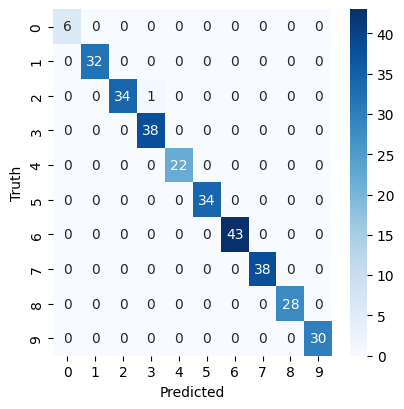

In [10]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(4.5,4.5))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [11]:
# f1 score -> averge of precision and recall
from sklearn.metrics import f1_score
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("weighted",f1_weighted)
print("macro", f1_macro)

weighted 0.9967295657832742
macro 0.9972520233389798


In [12]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(model, X_test, y_test, cv=k_folds)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.98387097 0.93442623 0.96721311 0.93442623 0.95081967]


The model remains generally good as shown with cross validation above

Since accuracy and f1 are very high we can skip hyperparameter tuning (it will bring very little benefit compared to computational cost)

In [13]:
""" In summary from the model we see a generally very good performance (we may suspect overfitting) """
# save the model
import joblib
models_summary.append({"model":model, "accuracy":accuracy_score, "f1_weighted":f1_weighted, "f1_macro":f1_macro})
joblib.dump(model, 'models/svc_model.pkl')
models_summary_df = pd.DataFrame(models_summary)
models_summary_df.head()

,model,accuracy,f1_weighted,f1_macro
0,SVC(),0.996732,0.99673,0.997252


## Model B - Random Forest

We chose to use a random forest because it provides good information on what features are most relevant to the data + is a white box model (so a lot of explainability)

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score = accuracy_score(y_test, y_pred)
print("Accuracy on test set: ", accuracy_score)

Accuracy on test set:  1.0


Text(26.97222222222222, 0.5, 'Truth')

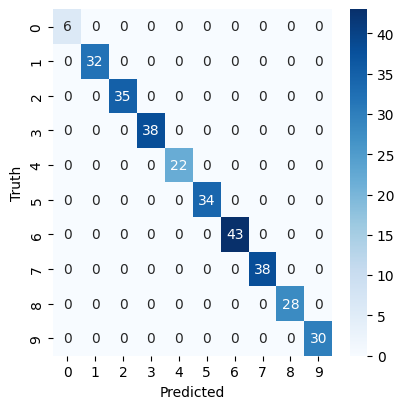

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
plt.figure(figsize=(4.5,4.5))
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [16]:
# f1 score -> averge of precision and recall
from sklearn.metrics import f1_score
f1_weighted = f1_score(y_test, y_pred, average='weighted')
f1_macro = f1_score(y_test, y_pred, average='macro')
print("weighted",f1_weighted)
print("macro", f1_macro)

weighted 1.0
macro 1.0


In [17]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [18]:
from sklearn.model_selection import KFold, cross_val_score

k_folds = KFold(n_splits=5)
scores = cross_val_score(model, X_test, y_test, cv=k_folds)
print("Cross-validated scores:", scores)

Cross-validated scores: [0.98387097 0.93442623 0.96721311 0.93442623 0.98360656]


Random forest model remains good as shown with cross validation scores

In [19]:
# create a decision tree plot
from sklearn.tree import plot_tree
plt.figure(figsize=(200,100))
plot_tree(model.estimators_[0], filled=True, feature_names=df.columns[:-1])
plt.show()

Since accuracy and f1 are very high we can skip cross-validtaion hyperparameter tuning (it will bring very little benefit compared to computational cost)

In [20]:
""" In summary from the model we see a generally very good performance (we may suspect overfitting) """
# save the model
import joblib
models_summary.append({"model":RandomForestClassifier(), "accuracy":accuracy_score, "f1_weighted":f1_weighted, "f1_macro":f1_macro})
joblib.dump(model, 'models/random_forest_model.pkl')
models_summary_df = pd.DataFrame(models_summary)
models_summary_df.head()

,model,accuracy,f1_weighted,f1_macro
0,SVC(),0.996732,0.99673,0.997252
1,RandomForestClassifier(),1.000000,1.00000,1.000000


## Model C - Multilayer perceptron

This model is an enhanced neural network model using TensorFlow, specifically Keras API.
1. Input Layer: The first layer is defined as an InputLayer with its shape set to the number of features in X_train.
2. Hidden Layers: The model includes two fully connected hidden layers. Each hidden layer is configured with:
  * A high number of neurons (1024 for the first hidden layer and 512 for the second) to capture complex relationships in the data.
  * The ReLU (Rectified Linear Unit) activation function, enabling the model to learn more complex patterns.
  * L2 regularization, applied to the layer's weights to prevent overfitting by penalizing large weights.
  * Xavier/Glorot uniform initialization for the weights, aiming to keep the scale of gradients roughly the same in all layers.
  * "BatchNormalization" to standardize the inputs to a layer for each mini-batch, stabilizing the learning process and reducing the number of training epochs required to train deep networks.
  * "Dropout(0.5)" to reduce overfitting by randomly setting input units to 0 during training with a frequency of 50% at each step.
3. Output Layer: The final layer is a dense layer with a number of neurons equal to the unique labels in df['label'], which is compatibale with classification tasks. It uses the softmax activation function to output probabilities of each class, which are interpretable as predictions.


In [21]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
import tensorflow as tf
import pandas as pd

# Assuming X_train, y_train, X_test, y_test, and df are already defined

model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0001)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(pd.unique(df['label'])), activation='softmax')
])

# Using a static initial learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.00001)

history = model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, callbacks=[early_stopping, reduce_lr])

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test Accuracy: {accuracy}")

Epoch 1/100
16/16 [==============================] - 6s 162ms/step - loss: 1.3053 - accuracy: 0.6731 - val_loss: 85.8341 - val_accuracy: 0.0204 - lr: 0.0010
Epoch 2/100
16/16 [==============================] - 1s 79ms/step - loss: 0.4151 - accuracy: 0.9091 - val_loss: 123.8657 - val_accuracy: 0.1184 - lr: 0.0010
Epoch 3/100
16/16 [==============================] - 1s 82ms/step - loss: 0.2462 - accuracy: 0.9561 - val_loss: 147.1304 - val_accuracy: 0.0163 - lr: 0.0010
Epoch 4/100
16/16 [==============================] - 1s 68ms/step - loss: 0.1742 - accuracy: 0.9775 - val_loss: 163.6745 - val_accuracy: 0.1347 - lr: 0.0010
Epoch 5/100
16/16 [==============================] - 1s 51ms/step - loss: 0.1486 - accuracy: 0.9775 - val_loss: 104.3994 - val_accuracy: 0.0163 - lr: 0.0010
Epoch 6/100
16/16 [==============================] - 1s 59ms/step - loss: 0.1260 - accuracy: 0.9877 - val_loss: 92.8382 - val_accuracy: 0.0163 - lr: 0.0010
Epoch 7/100
16/16 [==============================] - 1s 56m

10/10 [==============================] - 0s 5ms/step
Number of misclassified examples: 1
Index: 17, Predicted: 7, Actual: 2
Misclassification distribution: {2: 1}


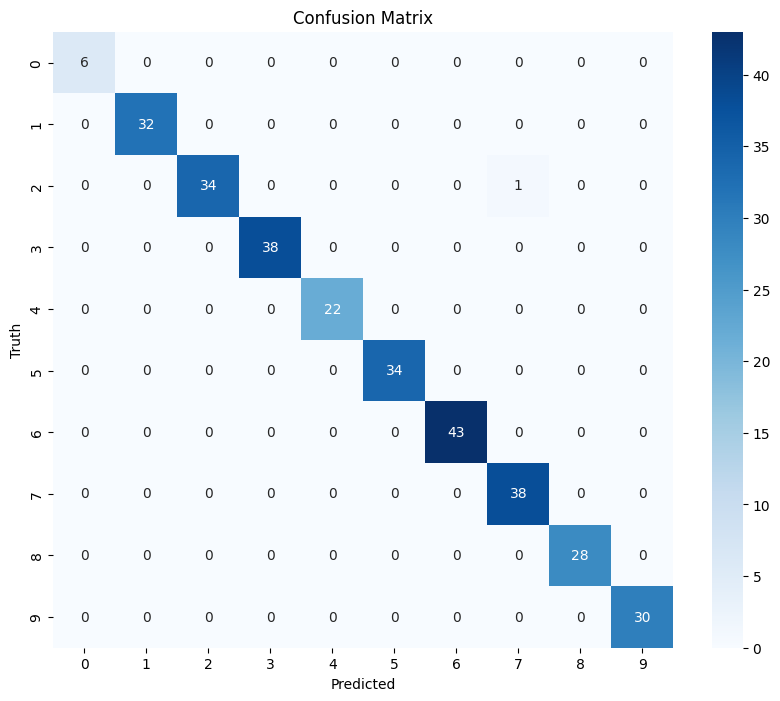

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential

# Predicting labels for the test set:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Identifying the indices of misclassified examples:
misclassified_indices = np.where(predicted_classes != y_test)[0]

# Analyzing the misclassified examples:
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Display the first 10 misclassified examples:
for index in misclassified_indices[:10]:
    print(f"Index: {index}, Predicted: {predicted_classes[index]}, Actual: {y_test[index]}")

# Calculating the distribution of misclassified classes:
misclassified_labels = y_test[misclassified_indices]
unique, counts = np.unique(misclassified_labels, return_counts=True)
misclassification_distribution = dict(zip(unique, counts))
print("Misclassification distribution:", misclassification_distribution)

# Compute the confusion matrix:
cm = confusion_matrix(y_test, predicted_classes)

# Define unique_labels for x_ticklabels and y_ticklabels in heatmap:
unique_labels = np.unique(np.concatenate((y_test, predicted_classes)))

# Visualize the confusion matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [23]:
from sklearn.model_selection import KFold
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, InputLayer
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import numpy as np
import pandas as pd

# Setting the seed for reproducibility
RANDOM_SEED_CONSTANT = 42  # FOR_REPRODUCIBILITY
tf.random.set_seed(RANDOM_SEED_CONSTANT)

# Load your data
X = df.drop(columns=['label']).values
y = df['label'].values

# Parameters
n_splits = 5
epochs = 100
batch_size = 64

# Initialize KFold
kf = KFold(n_splits=n_splits, shuffle=True, random_state=RANDOM_SEED_CONSTANT)

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=0.0001)

# Placeholder for fold evaluation metrics
fold_accuracy = []

for train_index, val_index in kf.split(X):
    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    # Define and compile the model here as in your initial setup
    model = tf.keras.Sequential([
        tf.keras.layers.InputLayer(input_shape=(X_train_fold.shape[1],)),
        tf.keras.layers.Dense(512, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(256, activation='relu', kernel_initializer='glorot_uniform', kernel_regularizer=l2(0.0001)),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(len(pd.unique(df['label'])), activation='softmax')
    ])
    # Compile the model within the loop
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Train the model
    model.fit(X_train_fold, y_train_fold, epochs=epochs, batch_size=batch_size, validation_data=(X_val_fold, y_val_fold),
              callbacks=[early_stopping, reduce_lr], verbose=0)

    # Evaluate the model
    _, accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    # Store the fold's accuracy
    fold_accuracy.append(accuracy)

# Calculate mean and standard deviation of accuracy
mean_accuracy = np.mean(fold_accuracy)
std_accuracy = np.std(fold_accuracy)

print(f"Cross-Validation Mean Accuracy: {mean_accuracy:.4f}, Standard Deviation: {std_accuracy:.4f}")

Cross-Validation Mean Accuracy: 0.9948, Standard Deviation: 0.0044


In [24]:
# f1 score:
from sklearn.metrics import f1_score
f1_weighted = f1_score(y_test, predicted_classes, average='weighted')
f1_macro = f1_score(y_test, predicted_classes, average='macro')
print("weighted",f1_weighted)
print("macro", f1_macro)

weighted 0.9967295657832741
macro 0.9972520233389798


Since accuracy and f1 are very high we can skip cross-validtaion hyperparameter tuning (it will bring very little benefit compared to computational cost)

In [25]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 512)               1549312   
                                                                 
 batch_normalization_10 (Ba  (None, 512)               2048      
 tchNormalization)                                               
                                                                 
 dropout_10 (Dropout)        (None, 512)               0         
                                                                 
 dense_16 (Dense)            (None, 256)               131328    
                                                                 
 batch_normalization_11 (Ba  (None, 256)               1024      
 tchNormalization)                                               
                                                                 
 dropout_11 (Dropout)        (None, 256)              

In [26]:
for layer in model.layers:
    print(layer.get_config())

{'name': 'dense_15', 'trainable': True, 'dtype': 'float32', 'units': 512, 'activation': 'relu', 'use_bias': True, 'kernel_initializer': {'module': 'keras.initializers', 'class_name': 'GlorotUniform', 'config': {'seed': None}, 'registered_name': None}, 'bias_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'kernel_regularizer': {'module': 'keras.regularizers', 'class_name': 'L2', 'config': {'l2': 9.999999747378752e-05}, 'registered_name': None}, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
{'name': 'batch_normalization_10', 'trainable': True, 'dtype': 'float32', 'axis': ListWrapper([1]), 'momentum': 0.99, 'epsilon': 0.001, 'center': True, 'scale': True, 'beta_initializer': {'module': 'keras.initializers', 'class_name': 'Zeros', 'config': {}, 'registered_name': None}, 'gamma_initializer': {'module': 'keras.initializers', 'class_name': 'Ones', 'config': {}, 'register

In [27]:
for layer in model.layers:
    params = layer.get_weights()
    if params:
        if layer.__class__.__name__ == "BatchNormalization":
            print(f"Layer: {layer.name} | Gamma (scale): {params[0].shape} | Beta (shift): {params[1].shape} | Moving Mean: {params[2].shape} | Moving Variance: {params[3].shape}")
        elif len(params) > 1:
            print(f"Layer: {layer.name} | Weights: {params[0].shape} | Biases: {params[1].shape}")
        else:
            print(f"Layer: {layer.name} | Single Parameter: {params[0].shape}")
    else:
        print(f"Layer: {layer.name} has no weights.")

Layer: dense_15 | Weights: (3025, 512) | Biases: (512,)
Layer: batch_normalization_10 | Gamma (scale): (512,) | Beta (shift): (512,) | Moving Mean: (512,) | Moving Variance: (512,)
Layer: dropout_10 has no weights.
Layer: dense_16 | Weights: (512, 256) | Biases: (256,)
Layer: batch_normalization_11 | Gamma (scale): (256,) | Beta (shift): (256,) | Moving Mean: (256,) | Moving Variance: (256,)
Layer: dropout_11 has no weights.
Layer: dense_17 | Weights: (256, 10) | Biases: (10,)


In [28]:
""" In summary from the model we see a generally very good performance (we may suspect overfitting) """
# Save the Keras model
model.save('models/mlp.h5')  # Saves the Keras model to an HDF5 file

# Update the models_summary list with your Keras model information:
models_summary.append({"model": "Multi Layer Perceptron",
                       "accuracy": accuracy,
                       "f1_weighted": f1_weighted,
                       "f1_macro": f1_macro})

# Convert the models_summary list to a DataFrame and display the first few rows:
models_summary_df = pd.DataFrame(models_summary)
models_summary_df.head()


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


,model,accuracy,f1_weighted,f1_macro
0,SVC(),0.996732,0.99673,0.997252
1,RandomForestClassifier(),1.000000,1.00000,1.000000
2,Multi Layer Perceptron,0.993464,0.99673,0.997252


## Model D - Simple Convolutional Neural Network

#### Import libraries

In [29]:
from sklearn.model_selection import KFold
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.optimizers import SGD

#### Prep data

Here the data is scaled to use the pixel grayscale values between 0 and 1. This is the only relevant part of the data, as colour is not being used. The data is being scaled because that is more optimal for the machine learning algorithm, and it's good practice for potential further use with data in a different range.

The digit classes (0-9) are also being put through one-hot-encoding, because they are categorical variables that the model will have a hard time with without being encoded. One-hot-encoding is used here is it's a great way to encode most categorical data, and the low sample size is ecellent, as it doesn't add too many convoluting features to the model.

The data is also being reshaped into 55x55 pixel grids (each image is a list of rows, not just one massive array) to make things easier to interpret.

In [30]:
print(X_train.shape)
trainX = X_train.reshape((X_train.shape[0], 55, 55, 1))
testX = X_test.reshape((X_test.shape[0], 55, 55, 1))

# one hot encoding
trainY = to_categorical(y_train)
testY = to_categorical(y_test)
print(trainX.shape)

(1224, 3025)
(1224, 55, 55, 1)


##### Scale data

In [31]:
trainX = trainX.astype('float32')
testX = testX.astype('float32')

trainX /= 255.0
testX/= 255.0

#### Define model
1. The model starts with a simple 2D convolutional layer. This is the basis of the network, and drives the image classification. It uses the relu activation function, which is also standard for CNNs.
2. The second layer is the much loved CNN pooling layer. CNN's are very sensetive to a features position in an image, and the pooling layer transforms features so the CNN can treat similar inputs the same without being confused by their position.
3. This processed data is then flattened to give features to the classifier.
4. The first dense layer is a fully connected layer to interpret each feature and their interactions. (10x10 features = 100 nodes).
5. The final layer is the output classifier using the softmax function to assign probability values to each possible class.

In [32]:
# add layers
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', input_shape=(55, 55, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

opt = SGD(learning_rate=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

#### Train model
This is just a first pass to see initial accuracy of the model as a whole. It seem good, so we will move onto cross validation

In [33]:
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
_, acc = model.evaluate(testX, testY, verbose=0)
print('Accuracy:', acc)

Accuracy: 0.9967319965362549


#### KFold cross validation
Next, the model is put through 5 fold cross validation. The accuracy for each evaluation round is displayed below, and remains very high.

In [34]:
scores, histories = list(), list()

kfold = KFold(5, shuffle=True, random_state=1)

for train_ix, test_ix in kfold.split(trainX):
  # select rows for train and test
  _trainX, _trainY, _testX, _testY = trainX[train_ix], trainY[train_ix], trainX[test_ix], trainY[test_ix]

  # fit model
  history = model.fit(_trainX, _trainY, epochs=10, batch_size=32, validation_data=(_testX, _testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('Accuracy:', acc)

  scores.append(acc)
  histories.append(history)

Accuracy: 0.9967319965362549
Accuracy: 0.9967319965362549
Accuracy: 0.9967319965362549
Accuracy: 0.9967319965362549
Accuracy: 0.9967319965362549


##### Display Results
The cross entropy loss and model accuracy are displayed below. In both aspects, the model is shown to be performing incredibly well.

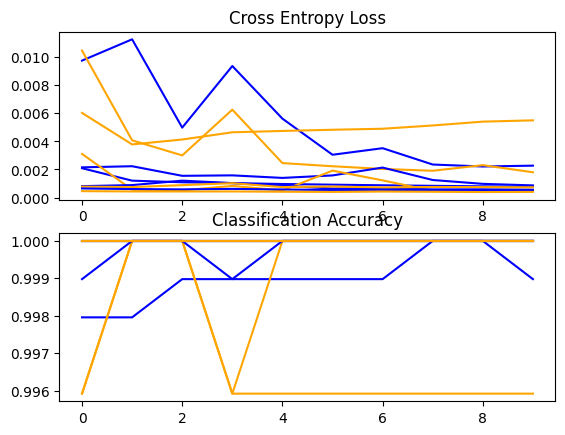

In [35]:
for i in range(len(histories)):
  plt.subplot(2, 1, 1)
  plt.title('Cross Entropy Loss')
  plt.plot(histories[i].history['loss'], color='blue', label='train')
  plt.plot(histories[i].history['val_loss'], color='orange', label='test')

  plt.subplot(2, 1, 2)
  plt.title('Classification Accuracy')
  plt.plot(histories[i].history['accuracy'], color='blue', label='train')
  plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')

Accuracy: mean=0.997 std=0.000, n=5


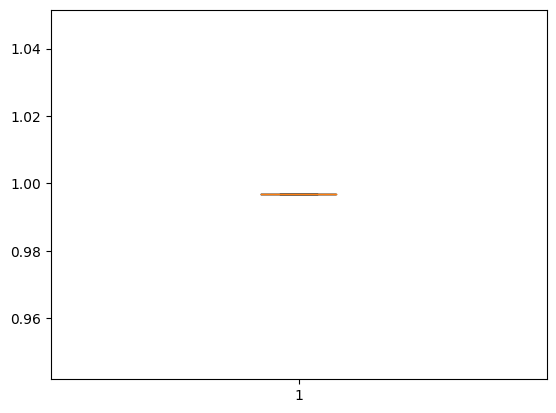

In [36]:
print('Accuracy: mean=%.3f std=%.3f, n=%d' % (np.mean(scores), np.std(scores), len(scores)))
plt.boxplot(scores)
plt.show()

#### Confusion matrix
Finall a confusion matrix is generated to visualise where exactly the inaccuracies are. Since the model is doing so well, we found there is typically only one or two misclasfication per training run.

In [37]:
# refit data
model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)

10/10 [==============================] - 0s 15ms/step
Number of misclassified examples: 1
Index: 17, Predicted: 8, Actual: [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
Misclassification distribution: {0.0: 9, 1.0: 1}


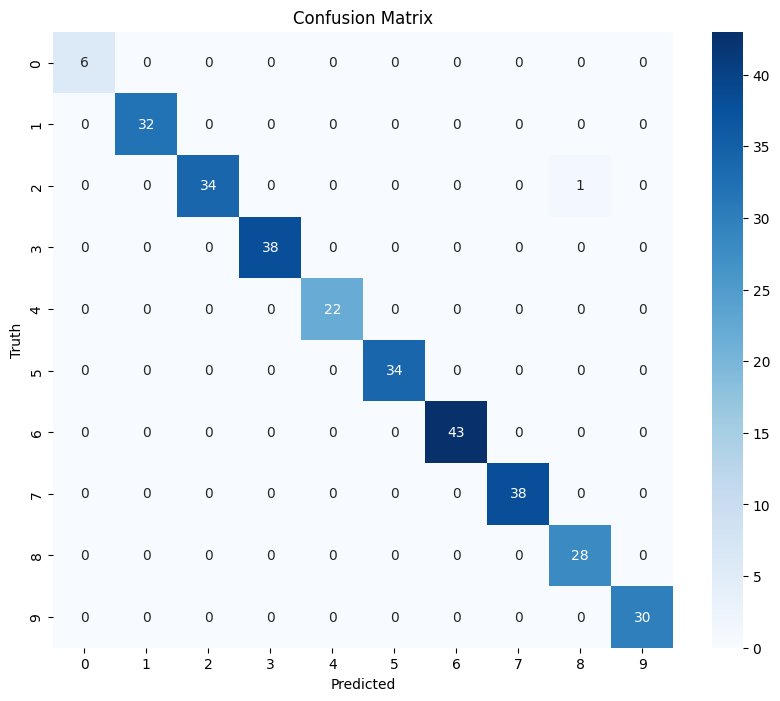

In [38]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential

# Predicting labels for the test set:
predictions = model.predict(testX)
predicted_classes = np.argmax(predictions, axis = 1)
actual_classes = np.argmax(testY, axis = 1)


# Identifying the indices of misclassified examples:
misclassified_indices = np.where(predicted_classes != actual_classes)[0]

# Analyzing the misclassified examples:
print(f"Number of misclassified examples: {len(misclassified_indices)}")

# Display the first 10 misclassified examples:
for index in misclassified_indices[:10]:
    print(f"Index: {index}, Predicted: {predicted_classes[index]}, Actual: {testY[index]}")

# Calculating the distribution of misclassified classes:
misclassified_labels = testY[misclassified_indices]
unique, counts = np.unique(misclassified_labels, return_counts=True)
misclassification_distribution = dict(zip(unique, counts))
print("Misclassification distribution:", misclassification_distribution)

# Compute the confusion matrix:
cm = confusion_matrix(actual_classes, predicted_classes)

# Define unique_labels for x_ticklabels and y_ticklabels in heatmap:
unique_labels = np.unique(np.concatenate((actual_classes, predicted_classes)))

# Visualize the confusion matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=unique_labels, yticklabels=unique_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [39]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 53, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 26, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 21632)             0         
                                                                 
 dense_18 (Dense)            (None, 100)               2163300   
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 2164630 (8.26 MB)
Trainable params: 2164630 (8.26 MB)
Non-trainable params: 0 (0.00 Byte)
________________

#### Save model

In [40]:
model.save('models/cnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
